In [2]:
import pandas as pd
import numpy as np

# read txt file as dataframe
X = pd.read_csv('data/x_train.txt', sep=' ', header=None)
# prefix 'x' to column names
X.columns = ['x' + str(i) for i in range(500)]
y = pd.read_csv('data/y_train.txt', header=None)

In [2]:
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x490,x491,x492,x493,x494,x495,x496,x497,x498,x499
0,-2.619773,-2.619533,-1.199350,-1.083335,-1.000910,-0.366967,-2.164037,-1.210001,-0.658311,-1.489539,...,10.849925,10.343346,10.717519,7.709295,5.894554,12.416573,6.765269,16.243907,7.209524,8.082021
1,-1.415579,-1.782544,-2.880270,-1.958863,1.159968,0.273030,-1.628728,-0.175813,-0.916857,-0.570166,...,11.489417,5.195818,3.494627,5.529154,10.517576,15.697333,11.324938,12.187670,12.283861,5.032285
2,-2.745092,-1.382945,-1.626015,-1.282560,-0.663146,0.052349,-2.403322,-0.765073,-0.394354,-0.806624,...,13.934934,9.267515,4.705604,6.642557,14.658934,8.130767,7.194487,11.939354,11.653620,5.942778
3,0.618998,0.455364,-0.115081,0.649040,-0.862207,2.308504,0.526114,-1.094852,1.088656,-0.481210,...,12.021328,3.852231,11.059702,7.527268,7.253120,9.791136,6.089743,10.752796,5.778888,10.366363
4,-0.070694,-0.550509,-0.565556,-0.693065,-0.573089,-0.395862,0.003170,-0.981609,-0.505775,-0.758430,...,7.537788,11.229665,11.318915,6.622256,12.557882,5.520360,5.397359,13.152269,10.684779,9.816471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.106210,-1.958227,-2.073105,-0.827217,0.797188,-0.544141,-1.176375,0.577295,-1.037255,-0.691466,...,8.031879,7.656727,16.252868,10.527859,6.264553,6.922600,12.269030,8.614451,8.801470,6.046766
4996,-3.203265,-3.604215,-1.303455,-1.769853,-3.093612,-3.293880,-3.031679,-3.727836,-2.351449,-2.562465,...,7.876297,6.453584,12.920065,4.730426,13.131292,8.244798,18.111135,8.575744,14.878834,11.100852
4997,-0.418994,-3.164231,-1.057789,-1.414368,0.495049,-1.455748,-1.530525,0.155972,-1.831778,-3.139882,...,6.924993,9.757964,18.191785,14.979645,9.510120,5.661958,7.205565,7.264520,11.036341,11.274324
4998,2.291015,1.073697,0.071849,0.475785,1.203500,2.087545,2.393297,1.198370,0.695188,0.829632,...,6.169952,5.159071,14.761030,5.710403,12.064430,17.109394,10.432060,10.090096,19.415991,9.163934


In [3]:
y[0].sum()

2496

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from boruta_unreleased.boruta import BorutaPy
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
y_train

,0
4227,0
4676,0
800,0
3671,0
4193,1
...,...
4426,0
466,1
3092,0
3772,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 1. Boruta
rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, n_estimators=1000)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=42, perc=100)
boruta_selector.fit(X_train, y_train.values.ravel())
# boruta_selector.fit(X_train, y_train)
columns_to_keep_boruta = np.array(X.columns)[boruta_selector.support_].tolist()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	482
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	1
Rejected: 	483
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	1
Rejected: 	483
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	1
Rejected: 	483
Iteration: 	16 / 100
Confirmed: 	16
Tenta

In [14]:
columns_to_keep_boruta

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x21',
 'x53',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x113',
 'x241',
 'x256',
 'x316',
 'x323',
 'x324',
 'x328',
 'x351',
 'x403',
 'x498']

In [16]:
# correlation matrix
corr_matrix = X_train[columns_to_keep_boruta].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x21,x53,x100,x101,x102,x103,x104,x105,x113,x241,x256,x316,x323,x324,x328,x351,x403,x498
x0,1.000000,0.852870,0.761760,0.736217,0.815799,0.760448,0.960361,0.812888,0.779275,0.718485,0.014606,0.004499,0.511763,0.147612,0.298082,0.319737,0.150560,0.233551,0.011637,-0.005113,-0.006955,0.009799,-0.025042,0.003841,0.041597,-0.008356,-0.031759,-0.022184
x1,0.852870,1.000000,0.765599,0.805294,0.754799,0.842229,0.891314,0.827559,0.870528,0.927765,0.005919,0.017782,0.145300,0.296696,0.176324,0.344958,0.274277,0.256105,0.001129,0.000877,0.002929,0.001212,-0.016219,0.018815,0.033705,-0.003722,-0.010655,-0.018710
x2,0.761760,0.765599,1.000000,0.630217,0.662090,0.615324,0.806738,0.708628,0.801875,0.696786,0.008252,-0.006162,0.424512,0.174382,0.485514,0.131154,0.158063,0.465345,0.000422,-0.004748,0.020912,0.009220,-0.032589,-0.001711,0.022198,-0.002613,-0.015053,-0.015142
x3,0.736217,0.805294,0.630217,1.000000,0.648379,0.767383,0.712145,0.734915,0.899252,0.703924,0.015420,0.022968,0.351202,0.545382,0.039052,0.139005,0.097782,0.209179,-0.012115,-0.004353,-0.015267,0.000740,-0.009223,0.029790,0.031778,-0.008447,-0.015992,-0.007598
x4,0.815799,0.754799,0.662090,0.648379,1.000000,0.795863,0.739786,0.943374,0.796856,0.697436,0.023740,0.005128,0.194800,0.133860,0.530614,0.566668,0.043289,0.189415,-0.012074,-0.007614,0.011878,0.008937,-0.010737,0.003646,0.026384,0.001299,-0.018571,-0.012259
x5,0.760448,0.842229,0.615324,0.767383,0.795863,1.000000,0.775871,0.856319,0.896204,0.737067,0.010381,0.006516,0.150231,0.353919,0.158647,0.518273,0.445667,0.330229,-0.010522,-0.006999,0.000790,0.001287,-0.011576,0.026098,0.030213,-0.005286,-0.007022,-0.014133
x6,0.960361,0.891314,0.806738,0.712145,0.739786,0.775871,1.000000,0.782955,0.796402,0.796141,0.010500,0.002351,0.443928,0.215699,0.253987,0.342973,0.188114,0.278548,0.013778,-0.001412,-0.003132,0.009110,-0.027472,0.002399,0.047474,-0.004801,-0.029234,-0.029039
x7,0.812888,0.827559,0.708628,0.734915,0.943374,0.856319,0.782955,1.000000,0.849672,0.719538,0.024346,0.010713,0.168149,0.109148,0.435270,0.480473,0.140301,0.231132,-0.009096,-0.007237,0.002412,0.009528,-0.013684,0.014486,0.033901,0.002976,-0.015863,-0.013734
x8,0.779275,0.870528,0.801875,0.899252,0.796856,0.896204,0.796402,0.849672,1.000000,0.806822,0.014615,0.010089,0.319544,0.487103,0.255852,0.385233,0.245307,0.298260,-0.015500,-0.005276,0.006472,0.001543,-0.013873,0.016982,0.030142,-0.003623,-0.014400,-0.011106
x9,0.718485,0.927765,0.696786,0.703924,0.697436,0.737067,0.796141,0.719538,0.806822,1.000000,0.003457,0.018178,0.010799,0.391048,0.127154,0.483968,0.049369,0.276819,-0.008504,0.006426,0.020579,0.000492,-0.008356,0.008502,0.028857,0.004339,-0.007077,-0.022936


In [61]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # prepare data for catboost
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train_boruta = X_train[['x9'] + columns_to_keep_boruta[10:]]
X_test_boruta = X_test[['x9'] + columns_to_keep_boruta[10:]]

# 2. CatBoost
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train_boruta, y_train, eval_set=(X_test_boruta, y_test), use_best_model=True)
y_pred = cat.predict(X_test_boruta)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.685
0.6953907815631263
0.6803921568627451


In [68]:
df_r = pd.DataFrame({'y': y_test.values.ravel(), 'y_pred': y_pred, 'y_prob': voting.predict_proba(X_test_boruta)[:,1]})

df_r = df_r.sort_values('y_prob', ascending=False).reset_index(drop=True)[:100]

_y_pred = df_r['y_pred']
_y = df_r['y']

print('precision:', precision_score(_y, _y_pred))
print('recall:', recall_score(_y, _y_pred))
print('accuracy:', accuracy_score(_y, _y_pred))

precision: 0.71
recall: 1.0
accuracy: 0.71


In [7]:
def effectiveness_score(y_test, y_pred, n_features, tp_reward=10, n_features_cost=200):
    tp = sum((y_test == 1) & (y_pred == 1))
    effectiveness = tp * tp_reward - n_features_cost * n_features
    return effectiveness

In [70]:
effectiveness_score(_y, _y_pred, 7, n_features_cost=20)

570

In [57]:
from sklearn.neural_network import MLPClassifier

columns_to_keep_boruta = [
    # 'x0',
    # 'x1',
    # 'x2',
    # 'x3',
    # 'x4',
    # 'x5',
    # 'x6',
    # 'x7',
    # 'x8',
    'x9',
    'x100',
    'x101',
    'x102',
    'x103',
    'x104',
    'x105'
    ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train_boruta = X_train[columns_to_keep_boruta]
X_test_boruta = X_test[columns_to_keep_boruta]
clf = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=100000, random_state=42)
clf.fit(X_train_boruta, y_train.values.ravel())
y_pred = clf.predict(X_test_boruta)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))


0.627
0.6092184368737475
0.6307053941908713


In [64]:
# voting classifier from xgboost, catboost, random forest, mlp
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

xgb = XGBClassifier(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)
rf = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=42)

voting = VotingClassifier(estimators=[('xgb', xgb), ('cat', cat), ('rf', rf)], voting='soft')
voting.fit(X_train_boruta, y_train.values.ravel())
y_pred = voting.predict(X_test_boruta)
print(accuracy_score(y_test, y_pred))   
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.682
0.6833667334669339
0.6806387225548902


In [59]:
import xgboost as xgb

columns_to_keep_boruta = [
    'x9',
    'x100',
    'x101',
    'x102',
    'x103',
    'x104',
    'x105'
    ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# X_train_boruta = X_train[columns_to_keep_boruta]
# X_test_boruta = X_test[columns_to_keep_boruta]
X_train_boruta = X_train
X_test_boruta = X_test
clf = xgb.XGBClassifier()
clf.fit(X_train_boruta, y_train.values.ravel())
y_pred = clf.predict(X_test_boruta)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.625
0.6152304609218436
0.6265306122448979


In [40]:
X_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x490,x491,x492,x493,x494,x495,x496,x497,x498,x499
995,2.030819,2.407028,2.648966,1.205645,1.510315,1.776966,2.058063,2.034490,1.795627,1.487177,...,10.092393,12.196862,15.429790,9.534026,4.606439,9.372364,7.389881,11.473231,9.898827,8.290906
2422,-1.726414,-2.633522,-1.162140,-2.038414,-0.937076,-0.651840,-1.183280,-1.743086,-0.845553,-1.277905,...,3.885966,12.338043,8.681461,7.561592,7.602912,13.748204,8.797192,17.030778,16.263698,5.086086
1621,3.033278,0.555239,3.241215,1.609806,2.798505,0.993924,1.516970,2.589368,1.735534,-0.440973,...,18.002023,6.504031,4.840490,10.944166,6.684301,21.268935,17.127839,6.414437,7.039843,12.311922
4165,-0.555536,0.144142,-2.651849,-0.382657,-1.528819,-1.304587,-0.463147,-1.307413,-1.852638,0.346744,...,5.737723,9.145979,5.483855,14.949781,6.404000,12.900422,9.436882,8.088401,15.438268,10.879405
613,-1.345714,0.842102,0.004147,0.899233,0.208414,0.314455,-1.171428,0.023675,0.960912,1.375291,...,7.113038,10.510377,17.180132,11.149402,7.400270,10.895293,9.047084,3.970921,9.487475,8.218334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,-1.171224,-3.113351,-1.672005,-1.869052,-1.154405,-0.306475,-1.348935,-1.641197,-1.180790,-3.001693,...,9.261208,20.432450,6.864565,16.252240,15.284064,10.929152,9.198509,8.183327,9.949907,6.351554
812,1.882548,1.642072,1.825150,0.347028,1.814865,0.066473,1.552841,1.518189,0.619432,1.522103,...,14.677511,12.879180,10.975129,4.997279,5.138241,9.983333,5.006185,4.461273,12.212317,4.908892
2746,0.625106,1.571134,0.419144,0.790168,-0.145103,-2.509843,0.952615,0.426122,-0.669300,2.266166,...,7.636359,6.109860,6.048574,8.667005,2.353722,5.248033,5.420601,16.303907,9.245494,11.918057
4177,2.509705,3.124422,2.591419,1.188067,1.497042,1.855118,2.887650,2.724174,1.743001,1.903610,...,7.367603,4.695973,10.901144,8.174237,12.492230,6.229995,16.929641,11.218731,11.680012,22.445767


In [37]:
from catboost import CatBoostClassifier
import xgboost as xgb


# 1. Boruta
# cb = CatBoostClassifier(verbose=0)
xgb_model = xgb.XGBClassifier()
# X_train = pd.DataFrame(X_train, columns=X.columns)
boruta_selector_cb = BorutaPy(estimator=xgb_model, n_estimators='auto', verbose=2, random_state=42)
# prepare catboost pool

boruta_selector_cb.fit(X_train.values, y_train.values.ravel())
columns_to_keep_boruta_catboost = np.array(X.columns)[boruta_selector_cb.support_].tolist()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	495
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	495
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	495
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	495
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	496
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	496
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	496
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	496
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	3


In [39]:
columns_to_keep_boruta_catboost

[]

In [46]:
from catboost import CatBoostClassifier
# import recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

columns_to_keep_boruta = [
    # 'x0',
    # 'x1',
    # 'x2',
    # 'x3',
    # 'x4',
    # 'x5',
    # 'x6',
    # 'x7',
    # 'x8',
    'x9',
    'x100',
    'x101',
    'x102',
    'x103',
    'x104',
    'x105'
    ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# prepare data for catboost
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train_boruta = X_train[columns_to_keep_boruta]
X_test_boruta = X_test[columns_to_keep_boruta]

# X_train_boruta = X_train[['x1', 'x100']]
# X_test_boruta = X_test[['x1', 'x100']]

# col1 = [i for i in range(10)]
# col2 = [i for i in range(100, 106)]

# # iterate through combinations of columns
# for i in range(10):
#     for j in range(6):
#         X_train_boruta = X_train[[f'x{col1[i]}', f'x{col2[j]}']]
#         X_test_boruta = X_test[[f'x{col1[i]}', f'x{col2[j]}']]
#         # 2. CatBoost
#         cat = CatBoostClassifier(verbose=0)
#         cat.fit(X_train_boruta, y_train, eval_set=(X_test_boruta, y_test), use_best_model=True)
#         y_pred = cat.predict(X_test_boruta)
#         print(f'x{col1[i]}', f'x{col2[j]}')
#         print(accuracy_score(y_test, y_pred))
#         print(recall_score(y_test, y_pred))

# 2. CatBoost
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train_boruta, y_train, eval_set=(X_test_boruta, y_test), use_best_model=True)
y_pred = cat.predict(X_test_boruta)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.591
0.5470941883767535
0.5986842105263158


In [4]:
X_test_boruta

,x0,x100,x101,x102,x103,x104,x105
0,-1.047568,-0.325220,-0.294211,-1.509813,-0.860431,0.036599,-1.010330
1,-1.261726,-0.005678,-1.592246,-0.103359,-0.435505,0.962750,-0.863794
2,-0.183283,0.005967,-0.612658,-0.839163,-0.587460,0.436424,0.014011
3,-0.735475,0.406817,0.352808,0.449180,-1.077295,0.414415,-1.094486
4,-0.140579,0.327286,0.488848,0.438149,0.495865,-0.136937,0.790989
...,...,...,...,...,...,...,...
995,1.093391,1.919928,0.634106,0.236183,-0.162677,-0.513884,0.773544
996,0.079672,-1.001117,0.704796,0.119031,-1.464582,0.409473,0.215766
997,1.572841,2.174196,-1.545119,1.664182,0.029407,-2.584808,0.615017
998,2.227234,2.027096,0.580423,0.970250,0.721662,-0.234729,2.408606


In [11]:
# apply Decision Tree with pruning to select features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

columns_to_keep_boruta = ['x0',
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x100',
    'x101',
    'x102',
    'x103',
    'x104',
    'x105']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# prepare data for catboost
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train_boruta = X_train[columns_to_keep_boruta]
X_test_boruta = X_test[columns_to_keep_boruta]

lsvc = LogisticRegression(C=0.5, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train_boruta, y_train)
model = SelectFromModel(lsvc, prefit=True)
columns_to_keep_l1 = X_train_boruta.columns[model.get_support()].tolist()


c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
columns_to_keep_l1

['x3', 'x4', 'x7', 'x100', 'x102', 'x103', 'x104', 'x105']

In [15]:
# apply Decision Tree with pruning to select features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

columns_to_keep_boruta = ['x0',
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x100',
    'x101',
    'x102',
    'x103',
    'x104',
    'x105']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train_boruta = X_train[columns_to_keep_boruta]
X_test_boruta = X_test[columns_to_keep_boruta]

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_boruta, y_train)
importance = clf.feature_importances_


In [16]:
importance

array([0.04179022, 0.05177719, 0.0396662 , 0.04714244, 0.05429269,
       0.02531466, 0.04548106, 0.03939572, 0.05197509, 0.03490598,
       0.09414897, 0.07638048, 0.10239958, 0.10145045, 0.10070993,
       0.09316933])

In [59]:
# apply catboost to selected features

cb = CatBoostClassifier(verbose=0)
# cb.fit(X_train[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x206', 'x102']], y_train, eval_set=(X_test[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x206', 'x102']], y_test), use_best_model=True)
# y_pred = cb.predict(X_test[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x206', 'x102']])
cb.fit(X_train[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x102']], y_train, eval_set=(X_test[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x102']], y_test), use_best_model=True)
y_pred = cb.predict(X_test[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x102']])
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.687
0.6913827655310621


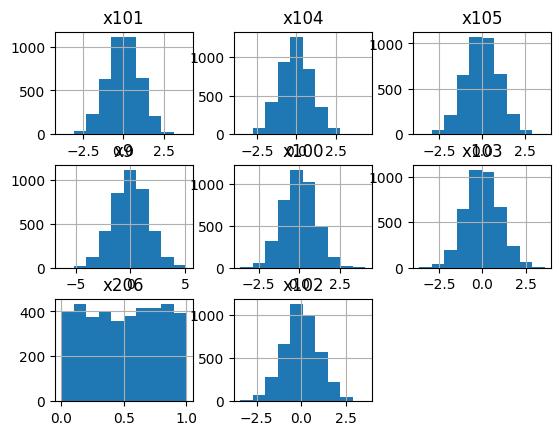

In [48]:
# create histograms of selected features
import matplotlib.pyplot as plt

X_train[['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x206', 'x102']].hist()
plt.show()

In [41]:
from BorutaShap import BorutaShap, load_data
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
model = CatBoostClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, random_state=0)

100%|██████████| 100/100 [41:37<00:00, 24.98s/it]  

8 attributes confirmed important: ['x101', 'x104', 'x105', 'x9', 'x100', 'x103', 'x206', 'x102']
492 attributes confirmed unimportant: ['x249', 'x275', 'x493', 'x285', 'x8', 'x400', 'x422', 'x279', 'x432', 'x299', 'x361', 'x154', 'x334', 'x372', 'x182', 'x147', 'x45', 'x342', 'x176', 'x265', 'x382', 'x297', 'x470', 'x426', 'x189', 'x294', 'x323', 'x460', 'x111', 'x286', 'x58', 'x16', 'x365', 'x115', 'x127', 'x482', 'x417', 'x163', 'x268', 'x98', 'x106', 'x13', 'x259', 'x295', 'x133', 'x357', 'x486', 'x96', 'x180', 'x135', 'x332', 'x139', 'x164', 'x455', 'x79', 'x267', 'x262', 'x494', 'x218', 'x264', 'x373', 'x456', 'x202', 'x390', 'x281', 'x444', 'x80', 'x256', 'x36', 'x94', 'x255', 'x344', 'x408', 'x245', 'x396', 'x431', 'x128', 'x499', 'x271', 'x489', 'x190', 'x465', 'x252', 'x131', 'x360', 'x240', 'x450', 'x71', 'x123', 'x177', 'x116', 'x226', 'x26', 'x47', 'x347', 'x380', 'x306', 'x469', 'x152', 'x354', 'x53', 'x129', 'x320', 'x428', 'x18', 'x335', 'x312', 'x398', 'x138', 'x212', '

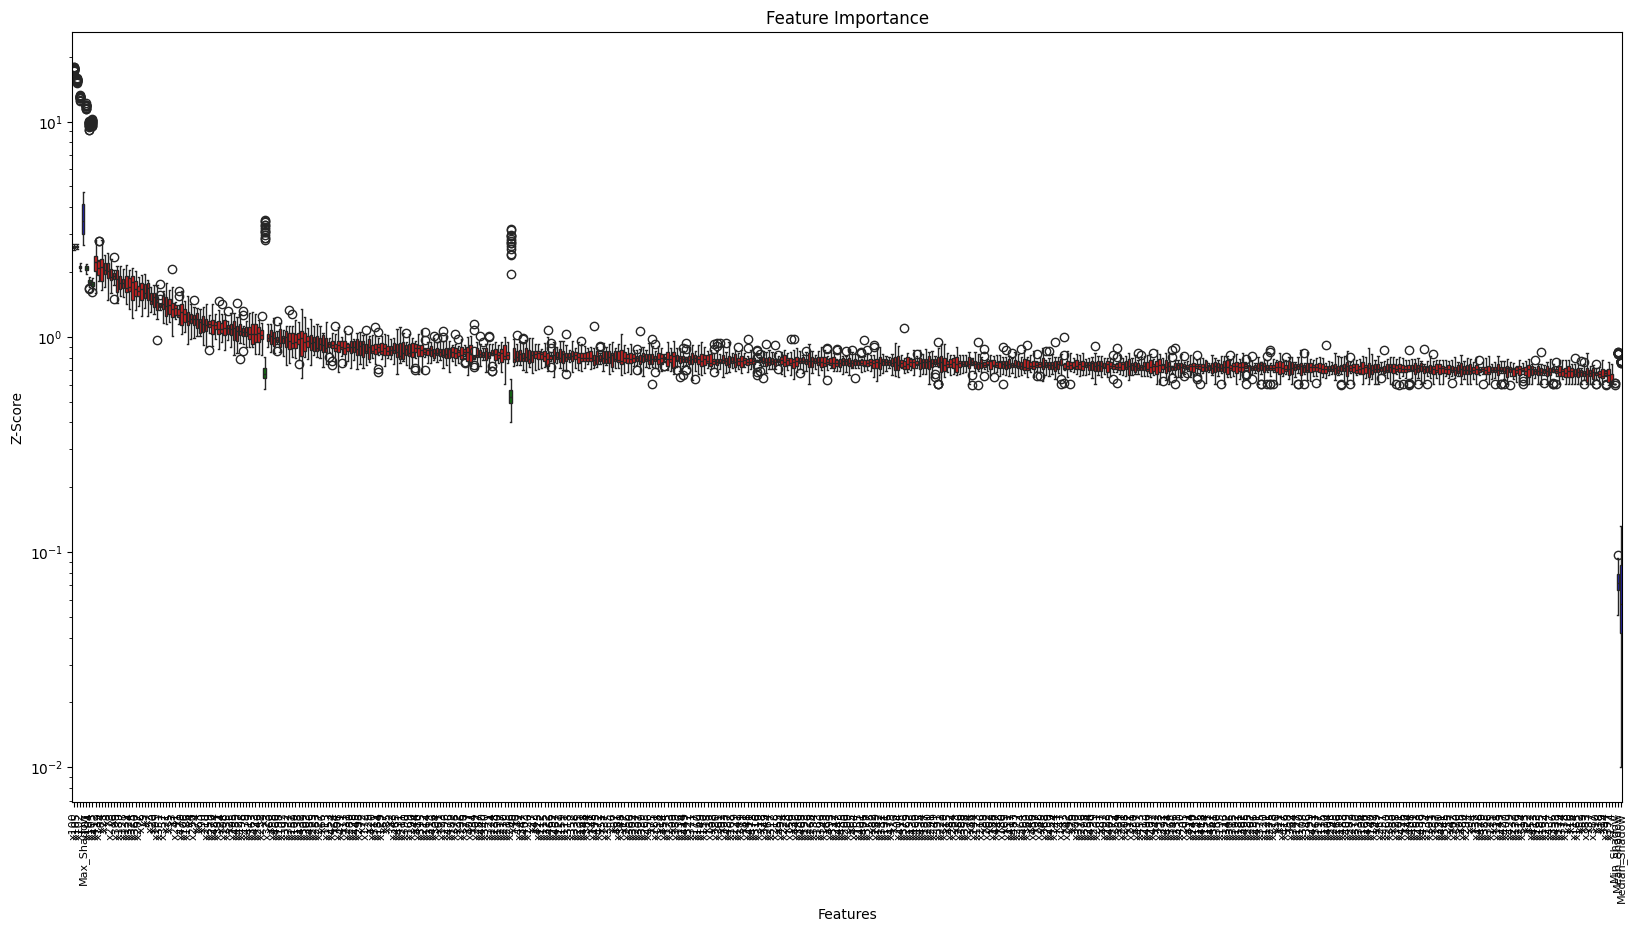

In [43]:
Feature_Selector.plot(which_features='all', figsize=(20, 10))

In [3]:
import matplotlib.pyplot as plt
# random df with 3 rows
_df = pd.DataFrame(np.random.randn(3, 500))
# column date to datetime
_df['date'] = pd.to_datetime('2021-01-01 10:54:00')
_df['date_2'] = pd.to_datetime('2021-01-01 11:24:00')
# round to nearest 10 minutes
_df['date'] = _df['date'].dt.round('10min')
_df['date_2'] = _df['date_2'].dt.round('10min')

for i, row in _df.iterrows():
    # print all 10 minute intervals between two dates
    for time in pd.date_range(row['date'], row['date_2'], freq='10min'):
        row['d'] = time
        # temp df with columns of row keys
        _df_temp = pd.DataFrame(row).T
        # find rows with this date and set d column value
        _df.loc[_df.index == i, 'd'] = time


In [83]:
_df_temp

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,date,date_2,d
2,-0.295704,-0.939247,0.431014,-1.478134,0.909354,-1.230274,0.051043,2.100279,1.679309,-1.400813,...,1.654934,-0.781576,0.798668,0.508654,1.89567,0.101549,0.574714,2021-01-01 10:50:00,2021-01-01 11:20:00,2021-01-01 11:20:00


In [6]:
_df = _df[_df.columns[:-3]]
# calculate corr with the last column and remove column if abs(corr) > 0.9
_df.loc[:, _df.corr().iloc[-1].abs() < 0.9]

,0,1,2,3,4,5,6,7,8,9,...,484,485,486,487,489,492,493,494,496,497
0,1.389233,-0.297222,-0.038371,0.922986,0.498855,0.452535,-1.092562,0.722874,1.374918,-1.151941,...,-0.151529,0.292818,-0.477939,0.443667,-0.136795,-0.100299,1.396282,0.194967,-1.019196,-0.670579
1,0.333160,0.054442,-1.253674,-0.273808,-0.651728,-1.271226,0.834035,-0.692530,-2.017151,-0.347912,...,1.170623,-1.949744,-0.058856,-1.680628,1.021426,-2.145727,0.567079,-0.651708,1.750937,1.084866
2,-0.181751,0.193900,0.454863,0.043350,-1.046686,-0.664998,0.299837,0.290166,-0.741136,-0.833183,...,-0.503012,0.033749,-0.498443,0.872104,-0.861893,-1.045656,1.274732,0.397015,-0.915263,1.053776


In [28]:
# Interface for different feature selection methods

from abc import ABC, abstractmethod
from typing import Any

class FeatureSelector(ABC):
    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def transform(self, X):
        pass

    @abstractmethod
    def fit_transform(self, X, y):
        pass

    @abstractmethod
    def get_support(self):
        pass

    @abstractmethod
    def print_support(self):
        pass

    # @abstractmethod
    # def get_importance(self):
    #     pass

class BorutaSelector(FeatureSelector):
    '''
    Boruta feature selection

    Parameters
    ----------
    estimator : Any
        The estimator to use for feature selection
    n_estimators : int, default=1000
        The number of estimators to use
    perc : int, default=100
        The percentage of features to keep
    alpha : float, default=0.05
        The alpha value
    two_step : bool, default=True
        Whether to use two step feature selection
    max_iter : int, default=100
        The maximum number of iterations
    random_state : Any, default=None
        The random state
    verbose : int, default=0
        The verbosity level
    early_stopping : bool, default=False
        Whether to use early stopping
    n_iter_no_change : int, default=20
        The number of iterations with no change
    limit : int, default=None
        The limit of features to keep

    Attributes
    ----------
    features : list
        The list of features to keep
    importance_history_ : array-like
        The importance history
    columns : list
        The list of columns

    Methods
    -------
    fit(X, y)
        Fit the feature selector
    transform(X)
        Transform the data
    fit_transform(X, y)
        Fit and transform the data
    get_support()
        Get the list of features to keep
    print_support()
        Print the number of features and the features
    get_importance()
        Get the importance of features

    '''
    def __init__(self,
                estimator: Any,
                n_estimators: int = 1000,
                perc: int = 100,
                alpha: float = 0.05,
                two_step: bool = True,
                max_iter: int = 100,
                random_state: Any | None = None,
                verbose: int = 0,
                early_stopping: bool = False,
                n_iter_no_change: int = 20,
                limit: int | None = None):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.perc = perc
        self.alpha = alpha
        self.two_step = two_step
        self.max_iter = max_iter
        self.random_state = random_state
        self.verbose = verbose
        self.early_stopping = early_stopping
        self.n_iter_no_change = n_iter_no_change
        self.features = None
        self.limit = limit
        self.importance_history_ = None
        self.columns = None

    def fit(self, X, y):
        selector = BorutaPy(estimator=self.estimator,
                                    n_estimators=self.n_estimators,
                                    perc=self.perc,
                                    alpha=self.alpha,
                                    two_step=self.two_step,
                                    max_iter=self.max_iter,
                                    random_state=self.random_state,
                                    verbose=self.verbose,
                                    early_stopping=self.early_stopping,
                                    n_iter_no_change=self.n_iter_no_change)
        selector.fit(X, y.values.ravel())
        self.features = np.array(X.columns)[selector.support_].tolist()
        self.importance_history_ = selector.importance_history_
        self.columns = X.columns
        if self.limit and len(self.features) > self.limit:
            importance_dict = self.get_importance()
            self.features = list(importance_dict.keys())[:self.limit]

    def transform(self, X):
        return X[self.features]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self):
        return self.features
    
    def print_support(self):
        print(f"Number of features: {len(self.features)}")
        print(f"Features: {self.features}")

    def get_importance(self):
        # importance_history_ : array-like, shape [n_features, n_iters]
        # Calculate the mean importance of each feature over all iterations
        means_ = np.mean(self.importance_history_, axis=0)
        importance_dict = dict(zip(self.columns, means_))
        # Sort the dictionary by value in descending order
        importance_dict = dict(sorted(importance_dict.items(), key=lambda item: abs(item[1]), reverse=True))
        return importance_dict

In [43]:
# Different feature selection methods

from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

class RFESelector(FeatureSelector):
    '''
    Recursive Feature Elimination feature selection

    Parameters
    ----------
    estimator : Any
        The estimator to use for feature selection
    n_features_to_select : int, default=None
        The number of features to select
    step : int, default=1
        The number of features to remove at each step
    verbose : int, default=0
        The verbosity level

    Attributes
    ----------
    features : list
        The list of features to keep
    ranking_ : array-like
        The feature ranking
    support_ : array-like
        The feature support
    columns : list
        The list of columns

    Methods
    -------
    fit(X, y)
        Fit the feature selector
    transform(X)
        Transform the data
    fit_transform(X, y)
        Fit and transform the data
    get_support()
        Get the list of features to keep
    print_support()
        Print the number of features and the features

    '''
    def __init__(self,
                estimator: Any,
                limit: int | None = None,
                step: int = 1,
                verbose: int = 0):
        self.estimator = estimator
        self.limit = limit
        self.step = step
        self.verbose = verbose
        self.features = None
        self.ranking_ = None
        self.support_ = None
        self.columns = None

    def fit(self, X, y):
        selector = RFE(estimator=self.estimator,
                        n_features_to_select=self.limit,
                        step=self.step,
                        verbose=self.verbose)
        selector.fit(X, y.values.ravel())
        self.features = np.array(X.columns)[selector.support_].tolist()
        self.ranking_ = selector.ranking_
        self.support_ = selector.support_
        self.columns = X.columns

    def transform(self, X):
        return X[self.features]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self):
        return self.features
    
    def print_support(self):
        print(f"Number of features: {len(self.features)}")
        print(f"Features: {self.features}")

class SelectFromModelSelector(FeatureSelector):
    '''
    Select From Model feature selection

    Parameters
    ----------
    estimator : Any
        The estimator to use for feature selection
    threshold : float, default=None
        The threshold to use
    prefit : bool, default=False
        Whether the estimator is already fitted

    Attributes
    ----------
    features : list
        The list of features to keep
    support_ : array-like
        The feature support
    columns : list
        The list of columns

    Methods
    -------
    fit(X, y)
        Fit the feature selector
    transform(X)
        Transform the data
    fit_transform(X, y)
        Fit and transform the data
    get_support()
        Get the list of features to keep
    print_support()
        Print the number of features and the features

    '''
    def __init__(self,
                estimator: Any,
                threshold: float | None = None,
                prefit: bool = False,
                limit: int | None = None):
        self.estimator = estimator
        self.threshold = threshold
        self.prefit = prefit
        self.features = None
        self.support_ = None
        self.columns = None
        self.limit = limit

    def fit(self, X, y):
        selector = SelectFromModel(estimator=self.estimator,
                                    threshold=self.threshold,
                                    prefit=self.prefit,
                                    max_features=self.limit)
        selector.fit(X, y.values.ravel())
        self.features = np.array(X.columns)[selector.get_support()].tolist()
        self.support_ = selector.get_support()
        self.columns = X.columns

    def transform(self, X):
        return X[self.features]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self):
        return self.features
    
    def print_support(self):
        print(f"Number of features: {len(self.features)}")
        print(f"Features: {self.features}")

class RFECVSelector(FeatureSelector):
    '''
    Recursive Feature Elimination with Cross Validation feature selection

    Parameters
    ----------
    estimator : Any
        The estimator to use for feature selection
    step : int, default=1
        The number of features to remove at each step
    cv : int, default=5
        The number of cross validation folds
    scoring : str, default=None
        The scoring metric
    verbose : int, default=0
        The verbosity level

    Attributes
    ----------
    features : list
        The list of features to keep
    ranking_ : array-like
        The feature ranking
    support_ : array-like
        The feature support
    columns : list
        The list of columns

    Methods
    -------
    fit(X, y)
        Fit the feature selector
    transform(X)
        Transform the data
    fit_transform(X, y)
        Fit and transform the data
    get_support()
        Get the list of features to keep
    print_support()
        Print the number of features and the features

    '''
    def __init__(self,
                estimator: Any,
                step: int = 1,
                cv: int = 5,
                scoring: str | None = None,
                verbose: int = 0,
                limit: int | None = None):
        self.estimator = estimator
        self.step = step
        self.cv = cv
        self.scoring = scoring
        self.verbose = verbose
        self.features = None
        self.ranking_ = None
        self.support_ = None
        self.columns = None
        self.limit = limit

    def fit(self, X, y):
        selector = RFECV(estimator=self.estimator,
                        step=self.step,
                        cv=self.cv,
                        scoring=self.scoring,
                        verbose=self.verbose)
        selector.fit(X, y.values.ravel())
        self.features = np.array(X.columns)[selector.support_].tolist()
        self.ranking_ = selector.ranking_
        self.support_ = selector.support_
        self.columns = X.columns
        if self.limit and len(self.features) > self.limit:
            # Use self.ranking_ to select the top features
            # Sort features by ranking and select the top limit features
            self.features = np.array(X.columns)[np.argsort(self.ranking_) < self.limit].tolist()

    def transform(self, X):
        return X[self.features]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self):
        return self.features
    
    def print_support(self):
        print(f"Number of features: {len(self.features)}")
        print(f"Features: {self.features}")


class LassoSelector(FeatureSelector):
    '''
    Lasso feature selection

    Parameters
    ----------
    alpha : float, default=1.0
        The alpha value
    max_iter : int, default=1000
        The maximum number of iterations
    random_state : Any, default=None
        The random state

    Attributes
    ----------
    features : list
        The list of features to keep
    coef_ : array-like
        The feature coefficients
    columns : list
        The list of columns

    Methods
    -------
    fit(X, y)
        Fit the feature selector
    transform(X)
        Transform the data
    fit_transform(X, y)
        Fit and transform the data
    get_support()
        Get the list of features to keep
    print_support()
        Print the number of features and the features

    '''
    def __init__(self,
                alpha: float = 1.0,
                max_iter: int = 1000,
                random_state: Any | None = None,
                limit: int | None = None):
        self.alpha = alpha
        self.max_iter = max_iter
        self.random_state = random_state
        self.features = None
        self.coef_ = None
        self.columns = None
        self.limit = limit

    def fit(self, X, y):
        selector = LogisticRegression(C=1/self.alpha,
                                    penalty='l1',
                                    solver='liblinear',
                                    max_iter=self.max_iter,
                                    random_state=self.random_state)
        selector.fit(X, y.values.ravel())
        self.features = np.array(X.columns)[selector.coef_[0] != 0].tolist()
        self.coef_ = selector.coef_[0]
        self.columns = X.columns
        if self.limit and len(self.features) > self.limit:
            importance_dict = self.get_importance()
            self.features = list(importance_dict.keys())[:self.limit]

    def transform(self, X):
        return X[self.features]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self):
        return self.features
    
    def print_support(self):
        print(f"Number of features: {len(self.features)}")
        print(f"Features: {self.features}")

    def get_importance(self):
        importance_dict = dict(zip(self.columns, self.coef_))
        # Sort the dictionary by value in descending order
        importance_dict = dict(sorted(importance_dict.items(), key=lambda item: abs(item[1]), reverse=True))
        return importance_dict
    
class GreedyGainSelector(FeatureSelector):
    '''
    Greedy Gain feature selection - inspired by the greedy algorithm and the evolution of features.

    Parameters
    ----------
    estimator : Any
        The estimator to use for feature selection
    method : str, default='top_1'
        The method to use for feature selection
        possible values: 'top_1', 'random_improvement'
            'top_1' - select the feature which improves the effectiveness score the most
            'random_improvement' - select a feature which improves the effectiveness score and is >= the current best score with probability proportional to the score
    cv_frac : float, default=0.25
        The fraction of the data to use for cross validation
    score_frac : float, default=0.2
        The fraction of the data to use for scoring - it is essential to use a fraction of the data for scoring to simulate the real world scenario
        where there is only a limited amount of predictions available for assigning label 1
    iterations : int, default=5
        The number of iterations to use in the cross validation
    verbose : int, default=0
        The verbosity level - 0 for no output, 1 for output

    Attributes
    ----------
    features : list
        The list of features to keep
    columns : list
        The list of columns

    Methods
    -------
    fit(X, y)
        Fit the feature selector
    transform(X)
        Transform the data
    fit_transform(X, y)
        Fit and transform the data
    get_support()
        Get the list of features to keep
    print_support()
        Print the number of features and the features

    IMPORTANT NOTE:
    
    Our final prediction for grading will be based on the effectiveness score.
    This test dataset have 5000 rows, where we can put max 1000 rows with label 1.
    In other words, we can have max 1000 true positives, so we have to put 1000/5000 = 0.2 
    fraction of the data for scoring (score_frac).

    Our training data by default have 4000 rows(final test 1000 rows) , with cv_frac = 0.25,
    we have 1000 rows for test (validation) dataset for cross validation. score_frac = 0.2 means
    that we will take 200 rows from the test dataset with the highest probability of 1
    to calculate the effectiveness score. It is important not to use all validation data for scoring
    because in the real world scenario we have only a limited amount of predictions
    available for assigning label 1.

    In final test scenario we will use effectiveness score:
    effectiveness = tp * tp_reward - n_features_cost * n_features
    where tp_reward = 10 and n_features_cost = 200

    In our cv scenario we will use the same effectiveness score, but we will calculate it
    effectiveness = tp * tp_reward - score_frac * n_features_cost * n_features

    We use score_frac here because maximum tp in the cv scenario is 0.2 * 1000 = 200 (5 times less
    than in the final test scenario), so we have to decrease the cost for features the same way. 
    
    '''

    def __init__(self,
                estimator: Any,
                method: str = 'top_1',
                cv_frac: float = 0.25,
                score_frac: float = 0.2,
                iterations: int = 5,
                verbose: int = 0
                ):
        self.estimator = estimator
        self.method = method
        self.cv_frac = cv_frac
        self.score_frac = score_frac
        self.iterations = iterations
        self.verbose = verbose
        self.features = None
        self.columns = None

    def _get_effectiveness_score(y_test, y_pred, n_features, tp_reward=10, n_features_cost=200, score_frac=0.2):
        tp = sum((y_test == 1) & (y_pred == 1))
        effectiveness = tp * tp_reward - score_frac * n_features_cost * n_features
        return effectiveness
    
    def fit(self, X, y):
        if self.method == 'top_1' or self.method == 'random_improvement':
            curr_best_score = -np.inf
            next_best_score = -np.inf
            best_column_set = []
            while next_best_score >= curr_best_score:
                df_scores = pd.DataFrame(columns=['column', 'score'])
                for col in X.columns:
                    if col in best_column_set:
                        continue
                    column_set = best_column_set + [col]
                    X_temp = X[column_set]
                    scores = []
                    for seed in range(self.iterations):
                        X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=self.cv_frac, random_state=seed, stratify=y)
                        self.estimator.fit(X_train, y_train.values.ravel())
                        y_pred = self.estimator.predict_proba(X_test)
                        # Take y_true and y_pred from the X_test.shape[0] * score_frac rows with the highest probability
                        df_r = pd.DataFrame({'y': y_test.values.ravel(), 'y_pred': y_pred[:, 1]})
                        df_r = df_r.sort_values('y_pred', ascending=False).reset_index(drop=True)[:int(X_test.shape[0] * self.score_frac)]
                        _y_pred = df_r['y_pred']
                        _y = df_r['y']
                        score = self._get_effectiveness_score(_y, _y_pred, len(column_set))
                        scores.append(score)
                    mean_score = np.mean(scores)
                    df_scores = pd.concat([df_scores, pd.DataFrame({'column': [col], 'score': [mean_score]})], ignore_index=True)
                next_best_score = df_scores['score'].max()
                if self.verbose == 1:
                    print("--------------------")
                    print(f"Current best score: {curr_best_score}")
                    print(f"Current selected features: {best_column_set}")
                    print(f"Head of scores dataframe:\n {df_scores.sort_values('score', ascending=False).head()}")
                if next_best_score > curr_best_score:
                    if self.method == 'top_1':
                        selected_column = df_scores[df_scores['score'] == next_best_score]['column'].values[0]
                        selected_column_score = df_scores[df_scores['score'] == next_best_score]['score'].values[0]
                    elif self.method == 'random_improvement':
                        if curr_best_score == -np.inf:
                            selected_column = df_scores[df_scores['score'] == next_best_score]['column'].values[0]
                            selected_column_score = df_scores[df_scores['score'] == next_best_score]['score'].values[0]
                        else:
                            df_scores_improvement = df_scores[df_scores['score'] >= curr_best_score]
                            # Select random column from the columns with score >= curr_best_score with probability proportional to the score
                            offset = min(df_scores_improvement['score'])
                            positiveweights = [x - offset + 1 for x in df_scores_improvement['score']]
                            df_scores_improvement['score_weights'] = positiveweights
                            selected_column = df_scores_improvement.sample(random_state=42, weights='score_weights')['column'].values[0]
                            # selected_column = df_scores_improvement.sample(random_state=42)['column'].values[0]
                            selected_column_score = df_scores_improvement[df_scores_improvement['column'] == selected_column]['score'].values[0]
                    if self.verbose == 1:
                        print(f"Selected column: {selected_column}")
                        print(f"Selected column score: {selected_column_score}")
                    best_column_set.append(selected_column)
                    curr_best_score = selected_column_score
            self.features = best_column_set
            self.columns = X.columns
        else:
            raise ValueError('Invalid method: must be top_1 or random_improvement!')

    def transform(self, X):
        return X[self.features]
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)
    
    def get_support(self):
        return self.features
    
    def print_support(self):
        print(f"Number of features: {len(self.features)}")
        print(f"Features: {self.features}")

def remove_correlated_features(df: pd.DataFrame, threshold: float = 0.75):
    """
    Function to remove correlated features from the dataframe

    Parameters:
        df: pd.DataFrame : The input dataframe
        threshold: float : The threshold for the correlation value

    Returns:
        df: pd.DataFrame : The dataframe with the correlated features removed
    """

    corr_matrix = df.corr().abs()
    while True:
        # Select the biggest correlation to check if stop, exclude the diagonal
        # Set 0 for the diagonal elements
        np.fill_diagonal(corr_matrix.values, 0)
        max_corr = corr_matrix.max().max()
        if max_corr <= threshold:
            break
        idx = np.argmax(corr_matrix.max())
        # Remove the column with the biggest count of correlations
        df = df.drop(df.columns[idx], axis=1)
        corr_matrix = df.corr().abs()
    return df 

In [34]:
-np.inf <= -np.inf

True

In [21]:
X_train = pd.DataFrame(X_train, columns=X.columns)
df = remove_correlated_features(X_train, threshold=0.75)

In [24]:
corr_matrix = df.corr().abs()
np.fill_diagonal(corr_matrix.values, 0)
corr_matrix.max().max()

0.4832195004930439

In [37]:
df_ = df[df.columns[:10]]

In [45]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

xgb = XGBClassifier(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)
rf = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=42)

voting = VotingClassifier(estimators=[('xgb', xgb), ('cat', cat), ('rf', rf)], voting='soft')

ggs = GreedyGainSelector(estimator=voting, method='random_improvement', verbose=1)
ggs.fit(df, y_train)
ggs.print_support()

--------------------
Current best score: -inf
Current selected features: []
Head of scores dataframe:
     column      score
117   x126 -25.216031
100   x109 -25.222215
244   x253 -25.226413
429   x438 -25.228879
385   x394 -25.235864
Selected column: x126
Selected column score: -25.21603103239972
--------------------
Current best score: -25.21603103239972
Current selected features: ['x126']
Head of scores dataframe:
     column      score
384   x394 -26.437525
376   x386 -26.440578
182   x192 -26.448956
224   x234 -26.459984
120   x130 -26.467117
Number of features: 1
Features: ['x126']


In [46]:
import pickle

features = ggs.get_support()
with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)

In [26]:
def effectiveness_score(y_test, y_pred, n_features, tp_reward=10, n_features_cost=200):
    tp = sum((y_test == 1) & (y_pred == 1))
    effectiveness = tp * tp_reward - n_features_cost * n_features
    return effectiveness

In [30]:
from sklearn.metrics import make_scorer

estimator = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=42)
scoring = make_scorer(effectiveness_score, greater_is_better=True, n_features=0, tp_reward=10, n_features_cost=20)
selector = RFECVSelector(estimator=estimator, step=1, cv=5, scoring=scoring, verbose=0, limit=5)
selector.fit(X_train, y_train)
selector.print_support()

KeyboardInterrupt: 

In [2]:
import json
# read the json file
with open('./logs/GreedyGainSelector_VotingClassifier_random_improvement_0.25_0.2_5_True.json', 'r') as f:
    data = json.load(f)

In [3]:
data

{'1': {'curr_best_score': 0,
  'next_best_score': 1220.0,
  'best_column_set': [],
  'columns': ['x101',
   'x100',
   'x102',
   'x105',
   'x103',
   'x9',
   'x104',
   'x492',
   'x167',
   'x110',
   'x129',
   'x173',
   'x187',
   'x106',
   'x296',
   'x226',
   'x454',
   'x202',
   'x108',
   'x157',
   'x204',
   'x178',
   'x439',
   'x329',
   'x209',
   'x54',
   'x25',
   'x274',
   'x211',
   'x464',
   'x374',
   'x283',
   'x339',
   'x278',
   'x31',
   'x279',
   'x46',
   'x351',
   'x33',
   'x180',
   'x484',
   'x156',
   'x292',
   'x367',
   'x47',
   'x494',
   'x486',
   'x272',
   'x255',
   'x319',
   'x152',
   'x205',
   'x41',
   'x318',
   'x426',
   'x308',
   'x473',
   'x98',
   'x23',
   'x256',
   'x78',
   'x343',
   'x380',
   'x225',
   'x389',
   'x294',
   'x251',
   'x276',
   'x249',
   'x419',
   'x123',
   'x45',
   'x195',
   'x270',
   'x27',
   'x50',
   'x498',
   'x317',
   'x141',
   'x52',
   'x430',
   'x197',
   'x62',
   'x168',